In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Importing the dataset

sleepData = pd.read_csv("../data/SaYoPillow.csv")
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
# Converting the body temperature from farenheit to celsius

def convert_to_celsius(x):
    return (x - 32) * 5/9

sleepData["t"] = sleepData["t"].apply(convert_to_celsius)
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0


In [4]:
sleepData.corr()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [5]:
# Split the Dataset into Train and Test
train, test = train_test_split(sleepData, test_size = 0.25)
X_train = pd.DataFrame(train[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]])
y_train = pd.DataFrame(train["sl"])
X_test = pd.DataFrame(test[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]])
y_test = pd.DataFrame(test["sl"])

In [6]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Train Set : (472, 1) (472, 8)
Test Set  : (158, 1) (158, 8)
Intercept of Regression 	: b =  [2.31605323]
Coefficients of Regression 	: a =  [[ 0.00962331  0.01736884 -0.29424409 -0.07708295  0.04662513  0.03198678
  -0.11148475  0.04342211]]



,Predictors,Coefficients
0,sr,0.009623
1,rr,0.017369
2,t,-0.294244
3,lm,-0.077083
4,bo,0.046625
5,rem,0.031987
6,sr.1,-0.111485
7,hr,0.043422


In [7]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9998889289206102
Mean Squared Error (MSE) 	: 0.0002190226719954278

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9998955840901572
Mean Squared Error (MSE) 	: 0.00021691690035077987



In [8]:
predictingFactors = ["sr", "rr", "lm", "rem", "sl"]

for i in predictingFactors:
    print("~~~~~Predicting for {}~~~~~".format(i))
    # Predicting snoring rate (sr) with body temp (t), sleep hours (sr), blood oxygen (bo), heart rate (hr)
    y = pd.DataFrame(sleepData[i])
    X = pd.DataFrame(sleepData[["sr.1", "t", "bo", "hr"]])

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Check the sample sizes
    print("Train Set :", y_train.shape, X_train.shape)
    print("Test Set  :", y_test.shape, X_test.shape)

    # Import LinearRegression model from Scikit-Learn
    from sklearn.linear_model import LinearRegression


    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Import mean_squared_error from sklearn
    from sklearn.metrics import mean_squared_error

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

~~~~~Predicting for sr~~~~~
Train Set : (472, 1) (472, 4)
Test Set  : (158, 1) (158, 4)
Intercept of Regression 	: b =  [28.26808676]
Coefficients of Regression 	: a =  [[-1.9530092   5.83476331 -2.65132096  1.46298636]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.96807274370456
Mean Squared Error (MSE) 	: 12.111824039020663

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9614822882362176
Mean Squared Error (MSE) 	: 13.840195547719194

~~~~~Predicting for rr~~~~~
Train Set : (472, 1) (472, 4)
Test Set  : (158, 1) (158, 4)
Intercept of Regression 	: b =  [-4.]
Coefficients of Regression 	: a =  [[-7.16562017e-16  1.66533454e-15 -9.85322934e-16  4.00000000e-01]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 7.006154480267969e-30

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 6.550541187658022e-30

~~~~~Predicting for lm~~~~~
Train Se

In [9]:
sleepData[['sl', 'sr.1']].groupby(['sl'], as_index=False).mean().sort_values(by='sr.1', ascending=False)

,sl,sr.1
0,0,8.0
1,1,6.0
2,2,3.5
3,3,1.0
4,4,0.0


In [10]:
sleepData[['sl', 't']].groupby(['sl'], as_index=False).mean().sort_values(by='t', ascending=False)

,sl,t
0,0,36.388889
1,1,35.000000
2,2,33.888889
3,3,32.777778
4,4,30.833333


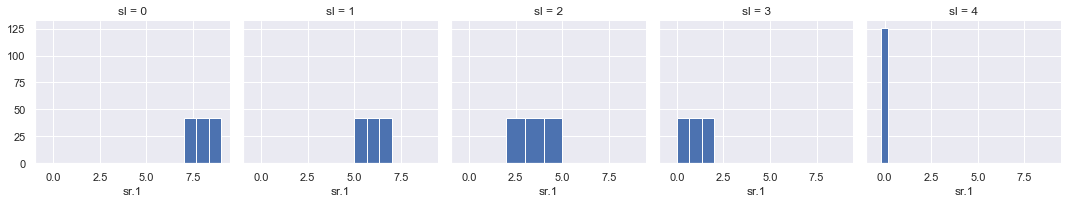

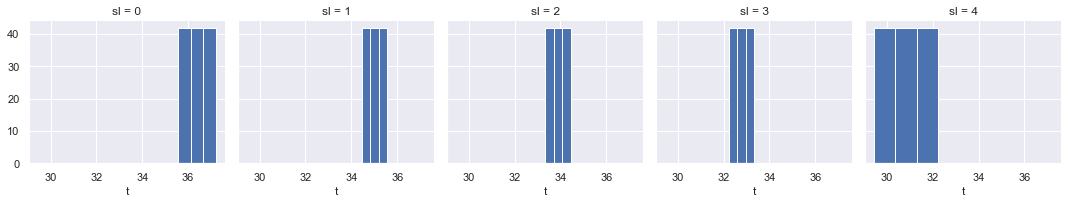

In [11]:
# Plotting the graph of sleep hours vs stress level

g = sns.FacetGrid(sleepData, col='sl')
g.map(plt.hist, 'sr.1', bins=3)

# Plotting the graph of body temperature vs stress level

g = sns.FacetGrid(sleepData, col='sl')
g.map(plt.hist, 't', bins=3)

In [12]:
# Getting to know the info of sleepData
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


Taking reference from: https://github.com/artikwh/K-Means-Clustering-Arti-Kushwaha/blob/main/K_Means_Clusteing_Arti_Kushwaha.ipynb

[313955.085321078, 74579.27163202374, 36464.669011208, 21114.038800122456, 13544.03087038136, 10072.100201260191, 7731.180252246606, 5853.831778275193, 4687.55880840638, 3653.4145248397876, 3001.0338112047384, 2469.983366954674, 2031.150515225699, 1791.1595100988477, 1603.6554972339063, 1375.8686672197305, 1188.910850691023, 1061.8961434506446, 956.1981639276951, 865.5600318222336]


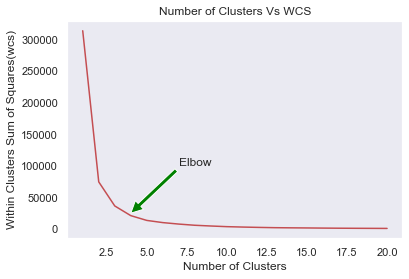

In [13]:
x = train.iloc[:, :].values
wcs = []  #wcs stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)

plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(7, 100000), xy=(4,25000), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

### Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 4.

## So optimum number of clusters for this dataset = 4

<AxesSubplot:xlabel='t', ylabel='sl'>

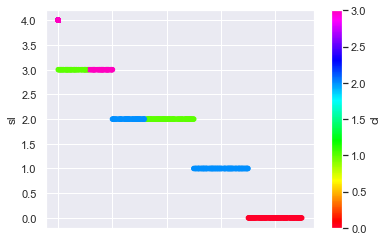

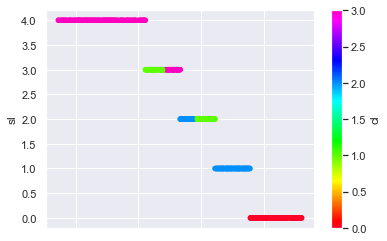

In [14]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
kmeans.fit(train)

# Trying to visualise the scatterplot between stress level (sl) and sleep hours (sr.1)
train['cl'] = kmeans.labels_
train.plot.scatter('sr.1', 'sl', c='cl', colormap='gist_rainbow')

# Trying to visualise the scatterplot between stress level (sl) and body temperature (t)
train['cl'] = kmeans.labels_
train.plot.scatter('t', 'sl', c='cl', colormap='gist_rainbow')